In [468]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Importing packages
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import cPickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve

In [469]:
df1 = pd.read_csv('./atasets/WDI - Education.csv')
df1 = df1[['Country Name','Time','Country Code','Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]','All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]','Children out of school (% of primary school age) [SE.PRM.UNER.ZS]','Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]','Duration of compulsory education (years) [SE.COM.DURS]','Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]','Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]','Expenditure on education as % of total government expenditure (%) [SE.XPD.TOTL.GB.ZS]','Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]','Government expenditure per student, primary (% of GDP per capita) [SE.XPD.PRIM.PC.ZS]','Gross enrollment ratio, primary, both sexes (%) [SE.PRM.ENRR]','Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]','Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]','Net enrolment rate, primary, both sexes (%) [SE.PRM.NENR]','Out-of-school children of primary school age, both sexes (number) [SE.PRM.UNER]','Percentage of enrolment in primary education in private institutions (%) [SE.PRM.PRIV.ZS]','Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]','School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]','Teachers in secondary education, both sexes (number) [SE.SEC.TCHR]','Youth literacy rate, population 15-24 years, both sexes (%) [SE.ADT.1524.LT.ZS]']]
df2 = pd.read_csv('./atasets/WDI - Economics - National accounts.csv')
df2 = df2[['Country Name','Time','Country Code','Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]','Adjusted net national income (constant 2010 US$) [NY.ADJ.NNTY.KD]','Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]','Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]','Adjusted net national income per capita (constant 2010 US$) [NY.ADJ.NNTY.PC.KD]','Adjusted net savings, excluding particulate emission damage (% of GNI) [NY.ADJ.SVNX.GN.ZS]','Adjusted net savings, excluding particulate emission damage (current US$) [NY.ADJ.SVNX.CD]','Adjusted net savings, including particulate emission damage (% of GNI) [NY.ADJ.SVNG.GN.ZS]','Adjusted net savings, including particulate emission damage (current US$) [NY.ADJ.SVNG.CD]','Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]','Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]','Exports of goods and services (constant 2010 US$) [NE.EXP.GNFS.KD]','GDP (constant LCU) [NY.GDP.MKTP.KN]','GDP (current US$) [NY.GDP.MKTP.CD]','GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD]','General government final consumption expenditure (constant 2010 US$) [NE.CON.GOVT.KD]','GNI (constant 2010 US$) [NY.GNP.MKTP.KD]','GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD]','Trade (% of GDP) [NE.TRD.GNFS.ZS]']]
# df3 = pd.read_csv('./atasets/WDI - Economics - Balance of payments.csv') not needed
# df4 = pd.read_csv('./atasets/WDI - Economics - Development assistance and PPP.csv')
df5 = pd.read_csv('./atasets/WDI - Economics - External debt.csv')
df5 = df5[['Country Name','Time','Country Code','Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS]']]
df6 = pd.read_csv('./atasets/WDI - Environment.csv')
df6 = df6[['Country Name','Time','Country Code','Urban population (% of total) [SP.URB.TOTL.IN.ZS]']]
# df7 = pd.read_csv('./atasets/WDI - Finance.csv') not needed
df8 = pd.read_csv('./atasets/WDI - Health.csv')
df8 = df8[['Country Name','Time','Country Code','Adults (ages 15+) and children (ages 0-14) newly infected with HIV [SH.HIV.INCD.TL]','Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]','Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]','Life expectancy at birth, total (years) [SP.DYN.LE00.IN]','Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]','Population, total [SP.POP.TOTL]']]
df9 = pd.read_csv('./atasets/WDI - Infrastructure.csv')
df9 = df9[['Country Name','Time','Country Code','Scientific and technical journal articles [IP.JRN.ARTC.SC]']]
df10 = pd.read_csv('./atasets/WDI - Public sector and Conflict.csv')
df10 = df10[['Country Name','Time','Country Code','Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]']]
df11 = pd.read_csv('./atasets/WDI - Social and Labor.csv')
df11 = df11[['Country Name','Time','Country Code','Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]','International migrant stock (% of population) [SM.POP.TOTL.ZS]','Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]']]
# df12 = pd.read_csv('./atasets/WDI - Trade and Private sector.csv')

In [470]:
df2.head(3)

,Country Name,Time,Country Code,Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG],Adjusted net national income (constant 2010 US$) [NY.ADJ.NNTY.KD],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG],Adjusted net national income per capita (constant 2010 US$) [NY.ADJ.NNTY.PC.KD],"Adjusted net savings, excluding particulate emission damage (% of GNI) [NY.ADJ.SVNX.GN.ZS]","Adjusted net savings, excluding particulate emission damage (current US$) [NY.ADJ.SVNX.CD]",...,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],Exports of goods and services (constant 2010 US$) [NE.EXP.GNFS.KD],GDP (constant LCU) [NY.GDP.MKTP.KN],GDP (current US$) [NY.GDP.MKTP.CD],GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD],General government final consumption expenditure (constant 2010 US$) [NE.CON.GOVT.KD],GNI (constant 2010 US$) [NY.GNP.MKTP.KD],GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD],Trade (% of GDP) [NE.TRD.GNFS.ZS]
0,Afghanistan,1990,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1990,ALB,NaN,NaN,1.756198e+09,NaN,NaN,6.298541,1.322520e+08,...,2.800000,5.879230e+07,NaN,3.613260e+11,2.101625e+09,1879.654764,NaN,NaN,NaN,38.065783
2,Algeria,1990,DZA,2.493406,6.220759e+10,4.842934e+10,-0.096158,2400.691516,10.181928,6.104585e+09,...,4.946261,2.965535e+09,3.943033e+10,2.134980e+11,6.204510e+10,3551.128516,6.125649e+09,8.959417e+10,3457.583725,48.380714


In [471]:
df_1 = df1.merge(df2, on=['Country Code', 'Time'], how='left')
df_1.head(3)

,Country Name_x,Time,Country Code,"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]","All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",Duration of compulsory education (years) [SE.COM.DURS],"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",...,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],Exports of goods and services (constant 2010 US$) [NE.EXP.GNFS.KD],GDP (constant LCU) [NY.GDP.MKTP.KN],GDP (current US$) [NY.GDP.MKTP.CD],GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD],General government final consumption expenditure (constant 2010 US$) [NE.CON.GOVT.KD],GNI (constant 2010 US$) [NY.GNP.MKTP.KD],GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD],Trade (% of GDP) [NE.TRD.GNFS.ZS]
0,Afghanistan,1990,AFG,NaN,NaN,NaN,NaN,NaN,NaN,622513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1990,ALB,NaN,NaN,NaN,NaN,NaN,NaN,278446.0,...,2.800000,5.879230e+07,NaN,3.613260e+11,2.101625e+09,1879.654764,NaN,NaN,NaN,38.065783
2,Algeria,1990,DZA,NaN,NaN,14.60961,NaN,NaN,NaN,4027612.0,...,4.946261,2.965535e+09,3.943033e+10,2.134980e+11,6.204510e+10,3551.128516,6.125649e+09,8.959417e+10,3457.583725,48.380714


In [472]:
df_1.shape

(7139, 43)

In [473]:
df1.shape

(7133, 23)

In [474]:
df2.shape

(7133, 22)

In [475]:
df_2= df_1.merge(df8, on=['Country Code', 'Time'], how='left')
df_3= df_2.merge(df5, on=['Country Code', 'Time'], how='left')
df_4= df_3.merge(df6, on=['Country Code', 'Time'], how='left')
df_6= df_4.merge(df9, on=['Country Code', 'Time'], how='left')
df_7= df_6.merge(df10, on=['Country Code', 'Time'], how='left')
df= df_7.merge(df11, on=['Country Code', 'Time'], how='left')
df.head(3)

,Country Name_x,Time,Country Code,"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]","All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",Duration of compulsory education (years) [SE.COM.DURS],"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",...,Country Name_x,Urban population (% of total) [SP.URB.TOTL.IN.ZS],Country Name_y,Scientific and technical journal articles [IP.JRN.ARTC.SC],Country Name_x,"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Country Name_y,"Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]",International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]"
0,Afghanistan,1990,AFG,NaN,NaN,NaN,NaN,NaN,NaN,622513.0,...,Afghanistan,18.316,NaN,NaN,NaN,NaN,Afghanistan,NaN,0.478025,NaN
1,Albania,1990,ALB,NaN,NaN,NaN,NaN,NaN,NaN,278446.0,...,Albania,36.428,NaN,NaN,NaN,NaN,Albania,NaN,2.011700,NaN
2,Algeria,1990,DZA,NaN,NaN,14.60961,NaN,NaN,NaN,4027612.0,...,Algeria,52.085,NaN,NaN,NaN,NaN,Algeria,NaN,1.057233,19.799999


In [476]:
df.shape

(13691, 62)

In [477]:
df.isnull().sum(axis=0)

Country Name_x                                                                                                            6563
Time                                                                                                                      6561
Country Code                                                                                                              6563
Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]                                               12838
All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]       12564
Children out of school (% of primary school age) [SE.PRM.UNER.ZS]                                                         9967
Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]                    12502
Duration of compulsory education (years) [SE.COM.DURS]                                                         

In [478]:
 def missing_values_0(data):
    if data.isnull().sum() > 0:
        print "Number of missing values replaced with zeros = ",  data.isnull().sum()
        ''' here you can replace it with the zeros'''
        data.fillna(0, inplace=True)
    elif data.isnull().sum() == 0:
        print "Number of missing values =  0"


In [479]:
 def missing_values_mean(data):
    if data.isnull().sum() > 0:
        print "Number of missing values replaced with mean = ",  data.isnull().sum()
        ''' here you can replace it with the zeros'''
        data.fillna(np.mean(data), inplace=True)
    elif data.isnull().sum() == 0:
        print "Number of missing values =  0"


In [480]:
 def missing_values_drop(data):
    if data.isnull().sum() > 0:
        print "Number of missing values dropped = ",  data.isnull().sum()
        data.dropna(inplace=True)
    elif data.isnull().sum() == 0:
        print "Number of missing values =  0"

In [481]:
df.drop(['Country Name_y', 'Country Name_x'
          ], axis=1, inplace=True) 

In [482]:
df.isnull().sum(axis=0)

Time                                                                                                                      6561
Country Code                                                                                                              6563
Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]                                               12838
All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]       12564
Children out of school (% of primary school age) [SE.PRM.UNER.ZS]                                                         9967
Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]                    12502
Duration of compulsory education (years) [SE.COM.DURS]                                                                   10232
Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.

In [483]:
#df = df.fillna(df.bfill())

In [484]:
#df = df.apply(pd.to_numeric, errors='coerce')

# http://stackoverflow.com/questions/18434208/pandas-converting-to-numeric-creating-nans-when-necessary

In [485]:
df.dropna(thresh=42, inplace=True)

In [486]:
#df.isnull().sum(axis=0)

In [487]:
#df.dropna(axis=1, inplace=True)

In [488]:
df.shape

(1112, 54)

In [489]:
missing_values_mean(df['Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]'])
missing_values_mean(df['All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]'])
missing_values_mean(df['Children out of school (% of primary school age) [SE.PRM.UNER.ZS]'])
missing_values_mean(df['Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]'])
missing_values_mean(df['Duration of compulsory education (years) [SE.COM.DURS]'])
missing_values_mean(df['Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]'])
missing_values_mean(df['Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]'])
missing_values_mean(df['Expenditure on education as % of total government expenditure (%) [SE.XPD.TOTL.GB.ZS]'])
missing_values_mean(df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'])
missing_values_mean(df['Gross enrollment ratio, primary, both sexes (%) [SE.PRM.ENRR]'])
missing_values_mean(df['Government expenditure per student, primary (% of GDP per capita) [SE.XPD.PRIM.PC.ZS]'])
missing_values_mean(df['Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]'])
missing_values_mean(df['Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]'])
missing_values_mean(df['Net enrolment rate, primary, both sexes (%) [SE.PRM.NENR]'])
missing_values_mean(df['Out-of-school children of primary school age, both sexes (number) [SE.PRM.UNER]'])
missing_values_mean(df['Percentage of enrolment in primary education in private institutions (%) [SE.PRM.PRIV.ZS]'])
missing_values_mean(df['Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]'])
missing_values_mean(df['School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]'])
missing_values_mean(df['Teachers in secondary education, both sexes (number) [SE.SEC.TCHR]'])
missing_values_mean(df['Youth literacy rate, population 15-24 years, both sexes (%) [SE.ADT.1524.LT.ZS]'])
missing_values_mean(df['Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]'])
missing_values_mean(df['Adjusted net national income (constant 2010 US$) [NY.ADJ.NNTY.KD]'])
missing_values_mean(df['Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]'])
missing_values_mean(df['Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]'])
missing_values_mean(df['Adjusted net national income per capita (constant 2010 US$) [NY.ADJ.NNTY.PC.KD]'])
missing_values_mean(df['Adjusted net savings, excluding particulate emission damage (% of GNI) [NY.ADJ.SVNX.GN.ZS]'])
missing_values_mean(df['Adjusted net savings, excluding particulate emission damage (current US$) [NY.ADJ.SVNX.CD]'])
missing_values_mean(df['Adjusted net savings, including particulate emission damage (% of GNI) [NY.ADJ.SVNG.GN.ZS]'])
missing_values_mean(df['Adjusted net savings, including particulate emission damage (current US$) [NY.ADJ.SVNG.CD]'])
missing_values_mean(df['Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]'])
missing_values_mean(df['Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]'])
missing_values_mean(df['Exports of goods and services (constant 2010 US$) [NE.EXP.GNFS.KD]'])
missing_values_mean(df['Urban population (% of total) [SP.URB.TOTL.IN.ZS]'])
missing_values_mean(df['GDP (constant LCU) [NY.GDP.MKTP.KN]'])
missing_values_mean(df['GDP (current US$) [NY.GDP.MKTP.CD]'])
missing_values_mean(df['GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD]'])
missing_values_mean(df['General government final consumption expenditure (constant 2010 US$) [NE.CON.GOVT.KD]'])
missing_values_mean(df['GNI (constant 2010 US$) [NY.GNP.MKTP.KD]'])
missing_values_mean(df['GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD]'])
missing_values_mean(df['Trade (% of GDP) [NE.TRD.GNFS.ZS]'])
missing_values_mean(df['Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]'])
missing_values_mean(df['International migrant stock (% of population) [SM.POP.TOTL.ZS]'])
missing_values_mean(df['Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]'])
missing_values_mean(df['Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]'])
missing_values_mean(df['Scientific and technical journal articles [IP.JRN.ARTC.SC]'])
missing_values_mean(df['Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS]'])

Number of missing values replaced with mean =  750
Number of missing values replaced with mean =  457
Number of missing values replaced with mean =  95
Number of missing values replaced with mean =  425
Number of missing values replaced with mean =  84
Number of missing values replaced with mean =  743
Number of missing values replaced with mean =  4
Number of missing values replaced with mean =  167
Number of missing values replaced with mean =  150
Number of missing values replaced with mean =  10
Number of missing values replaced with mean =  301
Number of missing values replaced with mean =  750
Number of missing values replaced with mean =  750
Number of missing values replaced with mean =  94
Number of missing values replaced with mean =  95
Number of missing values replaced with mean =  78
Number of missing values replaced with mean =  179
Number of missing values replaced with mean =  23
Number of missing values replaced with mean =  322
Number of missing values replaced with m

In [490]:
df.isnull().sum(axis=0)

Time                                                                                                                       0
Country Code                                                                                                               0
Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]                                                 0
All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]         0
Children out of school (% of primary school age) [SE.PRM.UNER.ZS]                                                          0
Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]                      0
Duration of compulsory education (years) [SE.COM.DURS]                                                                     0
Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]      0


In [491]:
# dropping redundant variables
#df.drop(['GNI (constant 2010 US$) [NY.GNP.MKTP.KD]', 'GDP (current US$) [NY.GDP.MKTP.CD]', 'GDP (constant LCU) [NY.GDP.MKTP.KN]', 'Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]', 'Expenditure on education as % of total government expenditure (%) [SE.XPD.TOTL.GB.ZS]', 'Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]','Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]','Adjusted net savings, including particulate emission damage (current US$) [NY.ADJ.SVNG.CD]','Adjusted net savings, excluding particulate emission damage (current US$) [NY.ADJ.SVNX.CD]','Adjusted net national income per capita (constant 2010 US$) [NY.ADJ.NNTY.PC.KD]','Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]','Adjusted net national income (constant 2010 US$) [NY.ADJ.NNTY.KD]' 
#          ], axis=1, inplace=True) 

In [492]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]",1112.0,8.284539e+01,1.039914e+01,1.545670e+01,8.284539e+01,8.284539e+01,8.284539e+01,9.989590e+01
"All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",1112.0,7.427131e+01,8.807019e+00,0.000000e+00,7.299535e+01,7.427131e+01,7.619005e+01,1.000000e+02
Children out of school (% of primary school age) [SE.PRM.UNER.ZS],1112.0,7.320880e+00,9.591635e+00,6.500000e-04,1.525070e+00,4.170415e+00,7.705010e+00,6.094600e+01
"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",1112.0,9.041705e+01,5.335795e+00,3.958061e+01,9.041705e+01,9.041705e+01,9.237616e+01,1.000000e+02
Duration of compulsory education (years) [SE.COM.DURS],1112.0,9.606518e+00,1.788448e+00,5.000000e+00,9.000000e+00,9.000000e+00,1.100000e+01,1.500000e+01
"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]",1112.0,7.875493e+01,1.286844e+01,2.561130e+00,7.875493e+01,7.875493e+01,7.875493e+01,1.000000e+02
"Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",1112.0,1.206164e+07,5.577718e+07,2.224900e+04,4.300732e+05,1.355952e+06,4.340958e+06,6.972120e+08
Expenditure on education as % of total government expenditure (%) [SE.XPD.TOTL.GB.ZS],1112.0,1.484992e+01,3.987149e+00,4.964300e+00,1.222374e+01,1.484992e+01,1.662397e+01,3.768692e+01
"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",1112.0,4.642839e+00,1.342232e+00,1.139180e+00,3.802793e+00,4.642839e+00,5.411003e+00,9.632920e+00
"Government expenditure per student, primary (% of GDP per capita) [SE.XPD.PRIM.PC.ZS]",1112.0,1.631795e+01,5.405741e+00,2.846470e+00,1.349125e+01,1.631795e+01,1.901913e+01,4.364271e+01


In [493]:
#df.rename(columns={
#        'Country Name_x':'country_name',
#    }, inplace=True)

In [494]:
df.head(5)

,Time,Country Code,"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]","All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",Duration of compulsory education (years) [SE.COM.DURS],"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",Expenditure on education as % of total government expenditure (%) [SE.XPD.TOTL.GB.ZS],...,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]","Population, total [SP.POP.TOTL]",Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],Urban population (% of total) [SP.URB.TOTL.IN.ZS],Scientific and technical journal articles [IP.JRN.ARTC.SC],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]","Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]",International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]"
109,1990,IDN,81.519852,74.271315,3.71972,90.417054,9.606518,78.754934,29933790.0,14.849923,...,63.259902,62.2,181436821.0,9.107088,30.584,29567.227528,48.28295,18.677375,0.256625,8.223474
155,1990,MEX,87.556152,74.271315,2.94252,90.417054,9.606518,78.754934,14493763.0,14.849923,...,70.795732,37.1,85609404.0,4.461483,71.419,29567.227528,48.28295,18.677375,0.812614,8.223474
187,1990,PAN,88.779861,74.271315,13.38016,90.417054,9.606518,78.754934,351021.0,14.849923,...,73.046244,25.7,2471010.0,5.553105,53.903,29567.227528,48.28295,18.677375,2.539205,8.223474
191,1990,PHL,93.573898,74.271315,1.55735,90.417054,9.606518,78.754934,10284861.0,14.849923,...,65.288073,40.8,61947340.0,8.239725,48.590,29567.227528,48.28295,18.677375,0.248713,8.100000
243,1990,TUR,79.232452,74.271315,5.62141,90.417054,9.606518,78.754934,6848083.0,14.849923,...,64.282341,55.8,53994605.0,5.008882,59.203,29567.227528,48.28295,18.677375,2.155189,8.000000


In [495]:
df.corr().T

,"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]","All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",Duration of compulsory education (years) [SE.COM.DURS],"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",Expenditure on education as % of total government expenditure (%) [SE.XPD.TOTL.GB.ZS],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Government expenditure per student, primary (% of GDP per capita) [SE.XPD.PRIM.PC.ZS]",...,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]","Population, total [SP.POP.TOTL]",Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],Urban population (% of total) [SP.URB.TOTL.IN.ZS],Scientific and technical journal articles [IP.JRN.ARTC.SC],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]","Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]",International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]"
"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]",1.000000,-0.005609,-0.468094,0.095467,0.118027,0.300478,-0.075406,-0.084801,0.076863,0.054812,...,0.379767,-0.472133,-0.051890,0.132505,0.342598,0.032517,0.010623,-0.258786,0.065254,0.125779
"All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",-0.005609,1.000000,-0.000034,0.346988,0.027785,-0.033455,0.019666,0.082088,-0.076984,-0.153766,...,-0.051433,0.070264,0.013556,-0.005951,-0.015148,-0.003606,0.083919,-0.001361,-0.018045,0.082765
Children out of school (% of primary school age) [SE.PRM.UNER.ZS],-0.468094,-0.000034,1.000000,-0.220433,-0.151230,-0.228573,0.072585,0.143253,-0.206952,-0.117925,...,-0.662491,0.738985,0.052406,-0.093466,-0.513337,-0.059694,-0.063562,0.286904,-0.123290,0.002047
"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",0.095467,0.346988,-0.220433,1.000000,0.053607,0.083433,0.002249,-0.075054,0.090832,0.067508,...,0.160999,-0.176968,0.002941,0.064602,0.161690,0.014798,-0.021625,-0.044583,0.022473,0.062491
Duration of compulsory education (years) [SE.COM.DURS],0.118027,0.027785,-0.151230,0.053607,1.000000,0.042847,-0.060421,-0.121475,0.156176,0.163083,...,0.358030,-0.311388,-0.046241,-0.007841,0.392229,0.043981,0.009588,-0.108405,0.107445,-0.033425
"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]",0.300478,-0.033455,-0.228573,0.083433,0.042847,1.000000,-0.013108,-0.166904,0.177227,0.236422,...,0.293985,-0.324636,-0.004143,0.079613,0.216880,0.070429,0.057829,-0.016212,0.085760,0.063686
"Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",-0.075406,0.019666,0.072585,0.002249,-0.060421,-0.013108,1.000000,0.023554,-0.088898,-0.036284,...,-0.090322,0.158887,0.992902,-0.060707,-0.129057,0.495749,0.034158,-0.023796,-0.168108,-0.075305
Expenditure on education as % of total government expenditure (%) [SE.XPD.TOTL.GB.ZS],-0.084801,0.082088,0.143253,-0.075054,-0.121475,-0.166904,0.023554,1.000000,0.386857,-0.020192,...,-0.334461,0.297184,0.006334,-0.146622,-0.245063,-0.072192,-0.113600,0.063661,-0.097106,0.002032
"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",0.076863,-0.076984,-0.206952,0.090832,0.156176,0.177227,-0.088898,0.386857,1.000000,0.563727,...,0.225751,-0.308572,-0.078565,-0.018463,0.234706,0.030305,0.007416,-0.029072,0.136224,0.024001
"Government expenditure pe

In [496]:
def dist_plotter(title, data, color):
    ''' here we set the canvas'''
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    '''here we set the components of the graph'''
    dist = sns.distplot(data, hist_kws={'alpha':0.6}, kde_kws={'linewidth':2}, color = color)
    
    '''here we define the mean and the components for the mean line'''
    dist.axvline(np.mean(data), lw=3, c='darkred', ls='--')
    average_roll = '{0:.2f}'.format(np.mean(data))
    
    '''here we add the title'''
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})

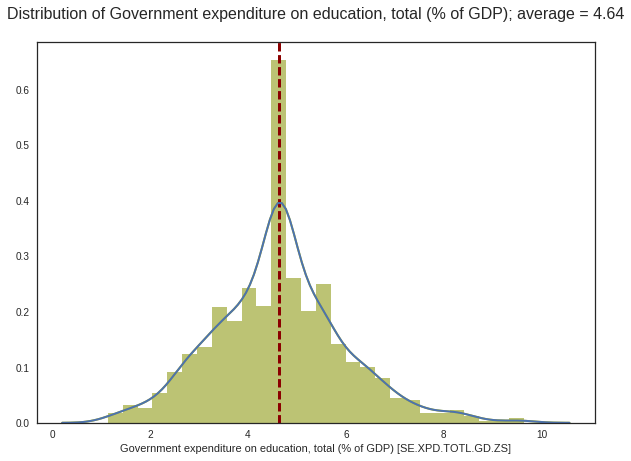

In [497]:
dist_plotter("Government expenditure on education, total (% of GDP)", df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'], 'y')

In [ ]:
X = df[['Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]',]]
y = df['Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]'].values

In [501]:
columns_ = df.columns.tolist()
exclude_cols = df['Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]']

y = df['Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]']

X = df[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape

(1112,) (1112, 54)


In [502]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(778, 54) (778,)
(334, 54) (334,)


In [503]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [506]:
# Continue on making regressions and graphs next. 